In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')


# Import Data

In [3]:
df = pd.read_excel('Data/Default.xlsx')
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

default student      balance        income  default2  student2
1      No      No   729.526495  44361.625074         0         0
2      No     Yes   817.180407  12106.134700         0         1
3      No      No  1073.549164  31767.138947         0         0

# 4.1

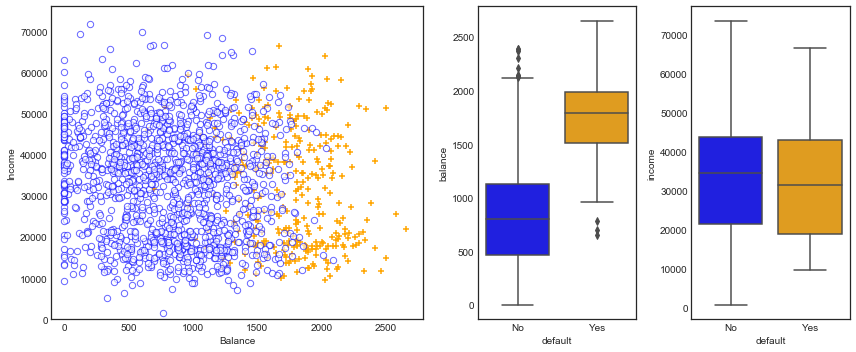

In [4]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
axis1 = plt.subplot(gs[0,:-2])
axis2 = plt.subplot(gs[0,-2])
axis3 = plt.subplot(gs[0,-1])

#Fraction of value no
df_no = df[df.default2 ==0].sample(frac=0.15)
#Fraction of value yes
df_yes = df[df.default2 ==1]
df_ = df_no.append(df_yes)

axis1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',  linewidths=1)
axis1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o',  linewidths=1, edgecolors = 'blue', facecolors='white', alpha=.6)

axis1.set_ylim(bottom=0) #replaces ymin
axis1.set_ylabel('Income')
axis1.set_xlim(left=-100) #replaces xmin
axis1.set_xlabel('Balance')

c_palette = {'No': 'Blue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=axis2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=axis3, palette=c_palette)
gs.tight_layout(plt.gcf())

## 4.3
### Figure 4.2

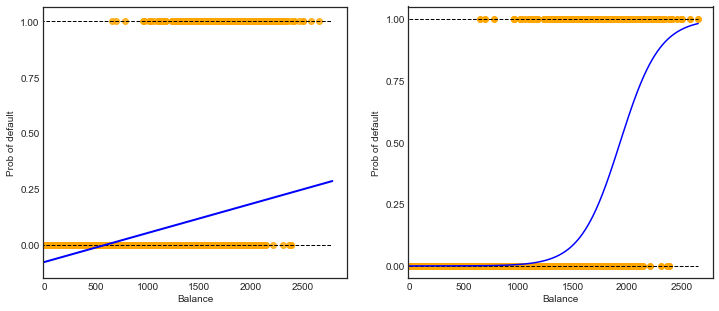

In [5]:
x_train = df.balance.values.reshape(-1,1)
y = df.default2

x_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(x_train,y)
prob=clf.predict_proba(x_test)

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,5))

#Left
sns.regplot(df.balance, df.default2, order=1, ci=None,
           scatter_kws={'color':'Orange'},
           line_kws={'color':'Blue', 'lw':2}, ax=axis1)
#Right
axis2.scatter(x_train, y, color='orange')
axis2.plot(x_test, prob[:,1], color='blue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Prob of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
    ax.set_xlim(left=-10)

### Table 4.1

In [6]:
y=df.default2

In [7]:
clf=skl_lm.LogisticRegression(solver='newton-cg')
x_train = df.balance.values.reshape(-1,1)
clf.fit(x_train,y)
print(clf)
print('\nclasses:      ', clf.classes_)
print('coefficients: ', clf.coef_)
print('intercept:    ', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

classes:       [0 1]
coefficients:  [[0.00549892]]
intercept:     [-10.65133001]


In [8]:
x_train = sm.add_constant(df.balance)
est = smf.Logit(y.ravel(), x_train).fit()
est.summary2().tables

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


[                     0                 1                  2            3
 0               Model:             Logit  Pseudo R-squared:        0.453
 1  Dependent Variable:                 y               AIC:    1600.4517
 2                Date:  2019-02-28 21:00               BIC:    1614.8724
 3    No. Observations:             10000    Log-Likelihood:      -798.23
 4            Df Model:                 1           LL-Null:      -1460.3
 5        Df Residuals:              9998       LLR p-value:  6.2329e-290
 6           Converged:            1.0000             Scale:       1.0000
 7      No. Iterations:           10.0000                                ,
              Coef.  Std.Err.          z          P>|z|     [0.025    0.975]
 const   -10.651331  0.361169 -29.491287  3.723665e-191 -11.359208 -9.943453
 balance   0.005499  0.000220  24.952404  2.010855e-137   0.005067  0.005931]

## Table 4.2

In [9]:
x_train = sm.add_constant(df.student2)
y = df.default2

est = smf.Logit(y, x_train).fit()
est.summary2().tables

#can do tables[0] or tables[1]  to see tables 

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


[                     0                 1                  2           3
 0               Model:             Logit  Pseudo R-squared:       0.004
 1  Dependent Variable:          default2               AIC:   2912.6831
 2                Date:  2019-02-28 21:00               BIC:   2927.1037
 3    No. Observations:             10000    Log-Likelihood:     -1454.3
 4            Df Model:                 1           LL-Null:     -1460.3
 5        Df Residuals:              9998       LLR p-value:  0.00054161
 6           Converged:            1.0000             Scale:      1.0000
 7      No. Iterations:            7.0000                               ,
              Coef.  Std.Err.          z     P>|z|    [0.025    0.975]
 const    -3.504128  0.070713 -49.554094  0.000000 -3.642723 -3.365532
 student2  0.404887  0.115019   3.520177  0.000431  0.179454  0.630320]

### Table 4.3

In [10]:
s_train = sm.add_constant(df[['balance', 'income', 'student2']])
est = smf.Logit(y, s_train).fit()
est.summary2().tables

#things not working -- working now

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


[                     0                 1                  2            3
 0               Model:             Logit  Pseudo R-squared:        0.462
 1  Dependent Variable:          default2               AIC:    1579.5448
 2                Date:  2019-02-28 21:00               BIC:    1608.3862
 3    No. Observations:             10000    Log-Likelihood:      -785.77
 4            Df Model:                 3           LL-Null:      -1460.3
 5        Df Residuals:              9996       LLR p-value:  3.2575e-292
 6           Converged:            1.0000             Scale:       1.0000
 7      No. Iterations:           10.0000                                ,
               Coef.  Std.Err.          z          P>|z|     [0.025    0.975]
 const    -10.869045  0.492273 -22.079320  4.995499e-108 -11.833882 -9.904209
 balance    0.005737  0.000232  24.736506  4.331521e-135   0.005282  0.006191
 income     0.000003  0.000008   0.369808   7.115254e-01  -0.000013  0.000019
 student2  -0.646776 

### Fig. 4.3

In [11]:
# balance and default vectors students
x_train = df[df.student == 'Yes'].balance.values.reshape(df[df.student == 'Yes'].balance.size,1) 
y = df[df.student == 'Yes'].default2

# balance and default vectors no students
x_train2 = df[df.student == 'No'].balance.values.reshape(df[df.student == 'No'].balance.size,1) 
y2 = df[df.student == 'No'].default2

# Vector with balance values for plotting
x_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf2 = skl_lm.LogisticRegression(solver='newton-cg')

clf.fit(x_train,y)
clf2.fit(x_train2,y2)

prob = clf.predict_proba(x_test)
prob2 = clf2.predict_proba(x_test)

#gmfu don't forget to run everything again when you restart notebook

In [12]:
df.groupby(['student','default']).size().unstack('default')

default    No  Yes
student           
No       6850  206
Yes      2817  127

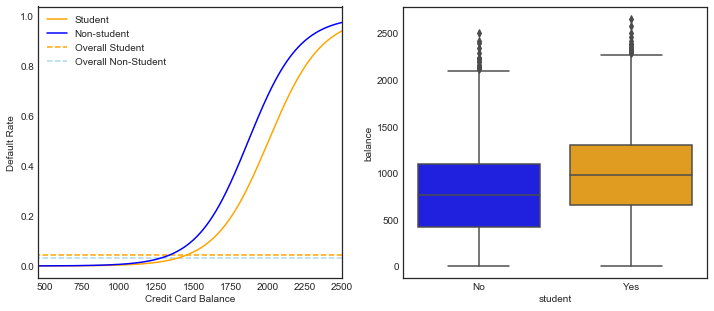

In [13]:
# plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.plot(x_test, pd.DataFrame(prob)[1], color='orange', label='Student')
ax1.plot(x_test, pd.DataFrame(prob2)[1], color='blue', label='Non-student')
ax1.hlines(127/2817, colors='orange', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot('student', 'balance', data=df, orient='v', ax=ax2,  palette=c_palette);

### Linear Disc. Analysis
#### 4.4

In [14]:
x = df[['balance', 'income', 'student2']].values
y = df.default2.values

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(x, y).predict(x)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status         No  Yes
Predicted default status           
No                        9645  254
Yes                         22   79

In [15]:
print(classification_report(y, y_pred, target_names=['No', 'Yes']))


              precision    recall  f1-score   support

          No       0.97      1.00      0.99      9667
         Yes       0.78      0.24      0.36       333

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.88      0.62      0.67     10000
weighted avg       0.97      0.97      0.97     10000



### 4.5

In [16]:
dec_prob = 0.2 #use 20% as probability default to be yes grammar who what????

y_prob = lda.fit(x, y).predict_proba(x)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_prob[:,1] > dec_prob})
df_.replace(to_replace={0:'No', 1:'Yes', 'True':'Yes', 'False':'No'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status         No  Yes
Predicted default status           
No                        9435  140
Yes                        232  193

### 4.5.3 LDA

In [17]:
df = pd.read_csv('Data/Smarket.csv', usecols=range(1,10), index_col=0, parse_dates=True)


In [18]:
x_train = df[:'2004'][['Lag1','Lag2']]
y_train = df[:'2004']['Direction']

x_test = df['2005':][['Lag1','Lag2']]
y_test = df['2005':]['Direction']

lda = LinearDiscriminantAnalysis()
pred = lda.fit(x_train, y_train).predict(x_test)

In [19]:
lda.priors_


array([0.49198397, 0.50801603])

In [20]:
lda.means_


array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [21]:
lda.coef_


array([[-0.05544078, -0.0443452 ]])